In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = 15,10

import warnings
warnings.filterwarnings('ignore')


In [355]:
train_path = '/content/drive/MyDrive/ds_study/ML/02.titanic/train.csv'
test_path = '/content/drive/MyDrive/ds_study/ML/02.titanic/test.csv'

In [404]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
view_cols = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']


#### Pclass</br>
: 등급이 높을수록 생존률이 높다.
</br></br>

#### Sex</br>
: 여성의 생존률이 압도적으로 높다.
</br></br>

#### Age</br>
: 10세이하, 77~78세 이상일 경우 생존률이 높다.
</br></br>

#### SipSp</br>
: 가족의 동행자가 1명일 경우가 생존률이 가장 높다.
</br></br>

#### Parch</br>
: 동승한 부모 혹은 자식 수 1~3의 비슷한 수준의 생존률을 보여주었다.
</br></br>

#### Fare</br>
: 요금 단위의 100 이하에 사망자들이 몰려있는 것으로 보인다.
</br></br>

#### Embarked</br>
: C 항구에서 탑승한 승객의 생존률이 높다.


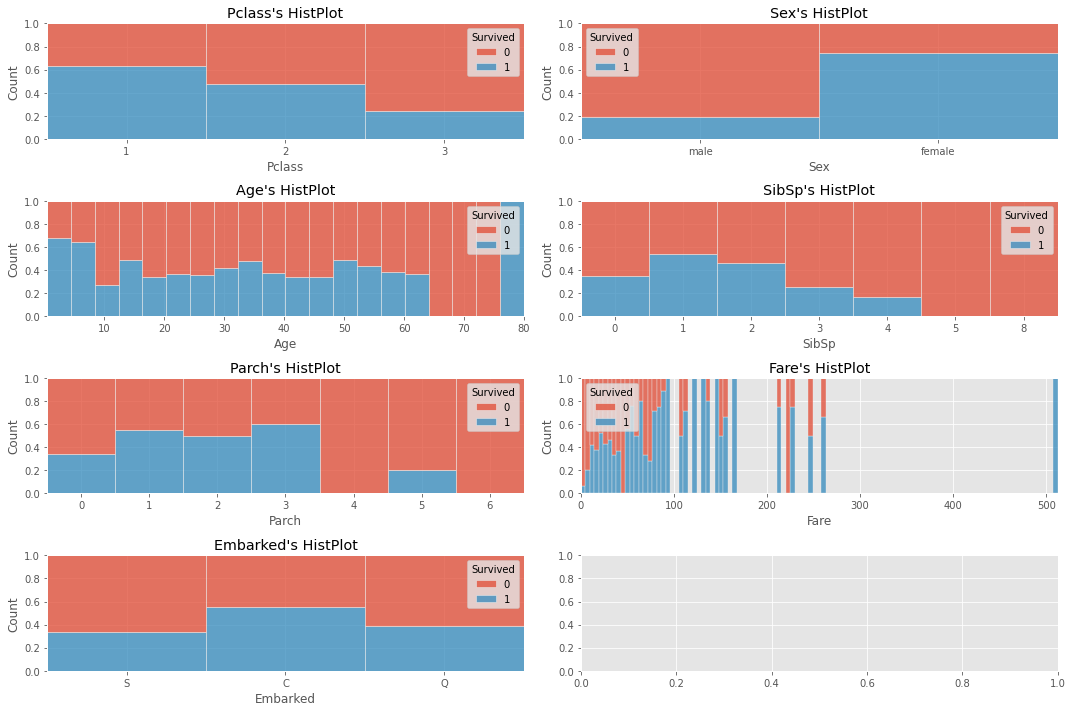

In [7]:
fig, axes = plt.subplots(4,2)
for idx, col in enumerate(view_cols):
  ax = axes[idx//2, idx%2]
  target_df = train_df[[col, 'Survived']]
  if col in ['Pclass', 'SibSp', 'Parch']:
    target_df[col] = target_df[col].astype(str)
    target_df.sort_values(col, inplace=True)
  sns.histplot(data = target_df, x = col, label=col, hue = 'Survived', ax = ax, multiple='fill')
  ax.set_title(col+"'s HistPlot")

plt.tight_layout()
plt.show()

In [8]:
categorical_cols = ['Name', 'Ticket', 'Cabin']

In [9]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [57]:
# Mr., Mrs., Miss, Unknown 4가지로 분류 후 시각화

def containString(value):
  if 'Mrs' in value:
    return 'Mrs'
  elif 'Miss' in value:
    return 'Miss'
  elif 'Mr' in value:
    return 'Mr'
  else:
    return 'Unknown'

train_df['NameDiv'] = train_df['Name'].apply(containString)


In [58]:
train_df['NameDiv'].value_counts()

Mr         518
Miss       180
Mrs        129
Unknown     64
Name: NameDiv, dtype: int64

#### Name</br>
: 다양한 이름을 분류하기 위해 Mr, Miss, Mrs, 그 외 4가지로 분류 진행.</br>
Mr : 518, 
Miss : 180,
Mrs : 129,
Unknown : 64으로 분류 됐다.</br>
Mr(남성)의 생존률이 굉장히 낮았다. 여성의 경우 Mrs일 경우 생존률이 더 높았다.


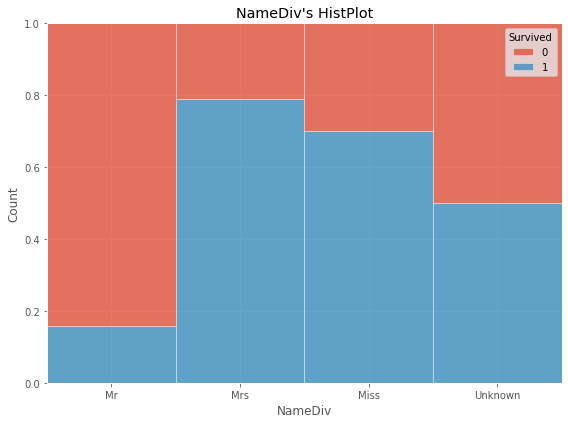

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(data = train_df , x= 'NameDiv', hue = 'Survived', label='NameDiv', multiple='fill')
plt.title("NameDiv's HistPlot")
plt.tight_layout()
plt.show()

In [13]:
# 티켓
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [59]:
# 숫자라벨만 있는 티켓과 없는 티켓?
import re

def divTicket(value):
  if re.search('[a-zA-z]*', value).group(0):
    return 'Mixed'
  else:
    return 'Number'


In [60]:
train_df['divTicket'] = train_df['Ticket'].apply(divTicket)

In [16]:
train_df['divTicket'].value_counts()

Number    661
Mixed     230
Name: divTicket, dtype: int64


#### Ticket</br>
: 티켓에 대한 분류 방법이 보이지 않아 숫자만 있는 티켓과 혼합된 티켓으로 분류.</br>
Number : 661, 
Mixed : 230</br>
티켓이 생존 구분하는데 영향을 줄 수 있는지 알 수 없었다. 다른 분류 방법이 있는지 찾아봐야할 듯.


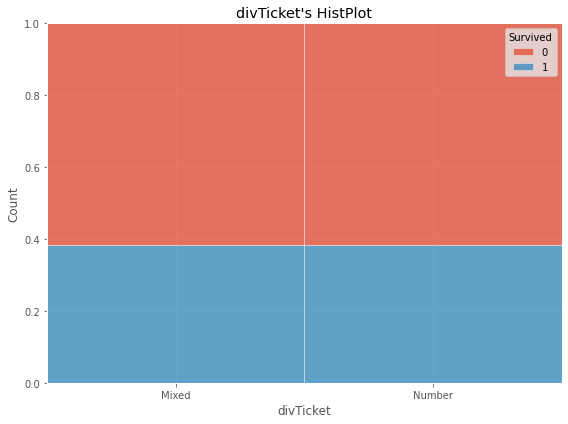

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(data = train_df , x= 'divTicket', hue = 'Survived', label='divTicket', multiple='fill')
plt.title("divTicket's HistPlot")
plt.tight_layout()
plt.show()

In [18]:
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [61]:
# 첫번째 알파벳 기준으로 객실 구분해보기 숫자만 있으면 None

def divCabin(value):
  try:
    if re.search('^[A-z]*', value).group(0):
      return str(re.search('^[A-z]*', value).group(0))
    else:
      return 'None'
  except:
    return 'None'

In [62]:
train_df['divCabin'] = train_df['Cabin'].apply(divCabin)

In [21]:
train_df['divCabin'].value_counts()

None    687
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
Name: divCabin, dtype: int64


#### Cabin</br>
: 객실 데이터에서 시작이 알파벳으로 시작하는 것으로 분류</br>

---
None : 687,</br>
C : 59,</br>
B : 47,</br>
D : 33,</br>
E : 32,</br>
A : 15,</br>
F : 13,</br>
G : 4,</br>
T : 1</br>

---

알파벳으로 시작하지 않는 데이터가 많았다. 입석인가라는 생각이 들었지만 그렇게 처리하기에는 너무 많은량이라 고민해봐야할 듯.</br>
이러한 점을 제외하고 데이터의 분포만 본다면 객실에 대한 정보가 있을 경우 생존률이 높다고 볼 수 있다.


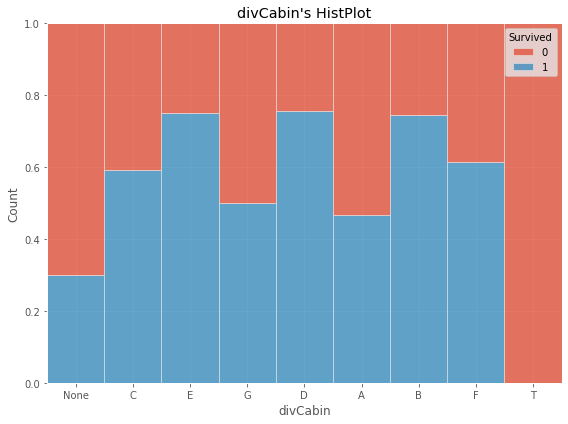

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(data = train_df , x= 'divCabin', hue = 'Survived', label='divCabin', multiple='fill')
plt.title("divCabin's HistPlot")
plt.tight_layout()
plt.show()

## 모델 적용

- 결측값이 있는 피처는 사용하지 않음.('Age', 'Fare')
- 커스텀 분리 후 생존 예측에 의미있을것이라 추측한 'Cabin', 'Name'은 분류 피처로 사용

In [132]:
test_df['NameDiv'] = test_df['Name'].apply(containString)
test_df['divCabin'] = test_df['Cabin'].apply(divCabin)

In [171]:
drop_cols = ['PassengerId', 'Ticket', 'Cabin', 'Name', 'Age', 'Fare', 'divTicket']
train_df_modify = train_df.drop(drop_cols, axis=1)

test_df_modify = test_df.drop(drop_cols[:-1], axis=1)


In [172]:
from sklearn.preprocessing import LabelEncoder

label_col = ['Sex', 'NameDiv', 'divCabin','Embarked']
les = []

for col in label_col:
  le = LabelEncoder()
  train_df_modify[col] = le.fit_transform(train_df_modify[col])
  test_df_modify[col] = le.transform(test_df_modify[col])
  les.append(le)

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

X = train_df_modify.drop('Survived', axis=1)
y = train_df_modify['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
logi = LogisticRegression()

In [176]:
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logi.fit(X_train, y_train)

tree_pred = tree.predict(test_df_modify)
rf_pred = rf.predict(test_df_modify)
xgb_pred = xgb.predict(test_df_modify)
logi_pred = logi.predict(test_df_modify)

In [177]:
from sklearn.metrics import accuracy_score

print("DecisionTree : {:.2f}%" .format(tree.score(X_test, y_test)*100))
print("RandomForest : {:.2f}%" .format(rf.score(X_test, y_test)*100))
print("XGBoost : {:.2f}%" .format(xgb.score(X_test, y_test)*100))
print("Logisitc : {:.2f}%" .format(logi.score(X_test, y_test)*100))

DecisionTree : 81.56%
RandomForest : 83.80%
XGBoost : 82.12%
Logisitc : 80.45%


In [178]:
submission = pd.read_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission.csv')

In [181]:
submission['Survived'] = rf_pred

In [182]:
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission.csv', index=False)

## 정확도 약 72%

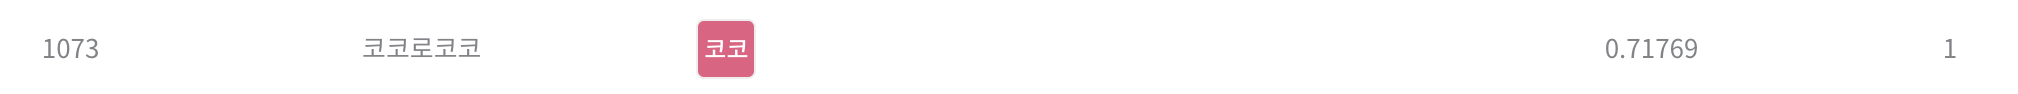

### 다시 전처리

- 전처리 해볼만한 사항
  - 이름
    - 4가지(Mr, Mrs, Miss, None)보다 더 세분화 분류가 가능한가?
  - 나이
    - 나이 피처를 사용하기 위해 대체값은 어떻게?
      - 평균, 최빈값, 이름 피처로 추측
  - 요금
    - 요금 피처를 사용하기 위한 대체값은 어떻게?
      - 그룹 최빈값?, 평균?
      


In [187]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 별칭 부분의 끝이 모두 '.'으로 끝나 이부분만 추출해보기로함

In [250]:
import re 

def divName(value):
  return re.search('([A-Za-z]*[.]+)', value).group(1)[:-1]

In [429]:
train_df_modify = train_df.copy()
test2_df = test_df.copy()

train_df_modify['divName'] = train_df_modify['Name'].apply(divName)
test2_df['divName'] = test2_df['Name'].apply(divName)

In [430]:
train_df_modify['divName'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

### 별칭 분류 
- 분류가 너무 큰 범주로 이뤄져 있었음. 새롭게 별칭을 분류

- Mr, Mrs, Master, Miss
  - Mr(성인 남자), Mrs(성인 여자)
  - Master(어린 남자), Miss(어린 여자)

- 그 외
  - 'Ms'는 20 ~ 40대 여성을 부르긴 하지만 20 ~ 30대에게 주로 사용한 다는 점에서 Miss로 사용
  - 'Mme'는 프랑스에서 마담을 부르는 별칭으로 'Mrs'로 대체
  - 'Major'는 법적으로 성년을 나타내는 의미. 남자는 Master, 여자는 Miss로 대체
  - 'Lady' 젊은 여성을 부른는 말로 'Miss'로 대체
  - 'Sir'는 남성을 존경하는 의미 높임말로 Mr로 대체
  - 'Mlle'는 프랑스에서 어른 남자아이를 부르는 말로 'Master'로 대체

- 이 조건에 포함되지 않는 별칭은 구분이 불가능하므로 Unkown 사용


In [431]:
# Mr., Mrs., Miss, Unknown 4가지로 분류 후 시각화

def divName_keyword1(value):
  if 'Mrs' in value:
    return 'Mrs'
  elif 'Miss' in value:
    return 'Miss'
  elif 'Mr' in value:
    return 'Mr'
  else:
    return 'Unknown'


def divName_keyword2(name, sex):
  
  text_Mr = ['Mr', 'Sir']
  text_Mrs = ['Mrs', 'Mme']
  text_Master = ['Master', 'Mlle']
  text_Miss = ['Miss', 'Lady', 'Ms']

  if name in text_Mr:
    return 'Mr'

  elif name in text_Mrs:
    return 'Mrs'
  
  elif name in text_Master:
    return 'Master'
    
  elif name in text_Miss:
    return 'Miss'
  
  elif name == 'Major':
    if sex == 'male':
      return 'Master'
    else:
      return 'Miss'

  else:
    return 'Unknown'
    

In [432]:
train_df_modify['divName_keyword1'] = train_df_modify['Name'].apply(divName_keyword1)
train_df_modify['divName_keyword2'] = train_df_modify.apply(lambda x : divName_keyword2(x['divName'], x['Sex']), axis=1)

test2_df['divName_keyword1'] = test2_df['Name'].apply(divName_keyword1)
test2_df['divName_keyword2'] = test2_df.apply(lambda x : divName_keyword2(x['divName'], x['Sex']), axis=1)

In [433]:
train_df_modify['divName_keyword2'].value_counts()

Mr         518
Miss       184
Mrs        126
Master      44
Unknown     19
Name: divName_keyword2, dtype: int64

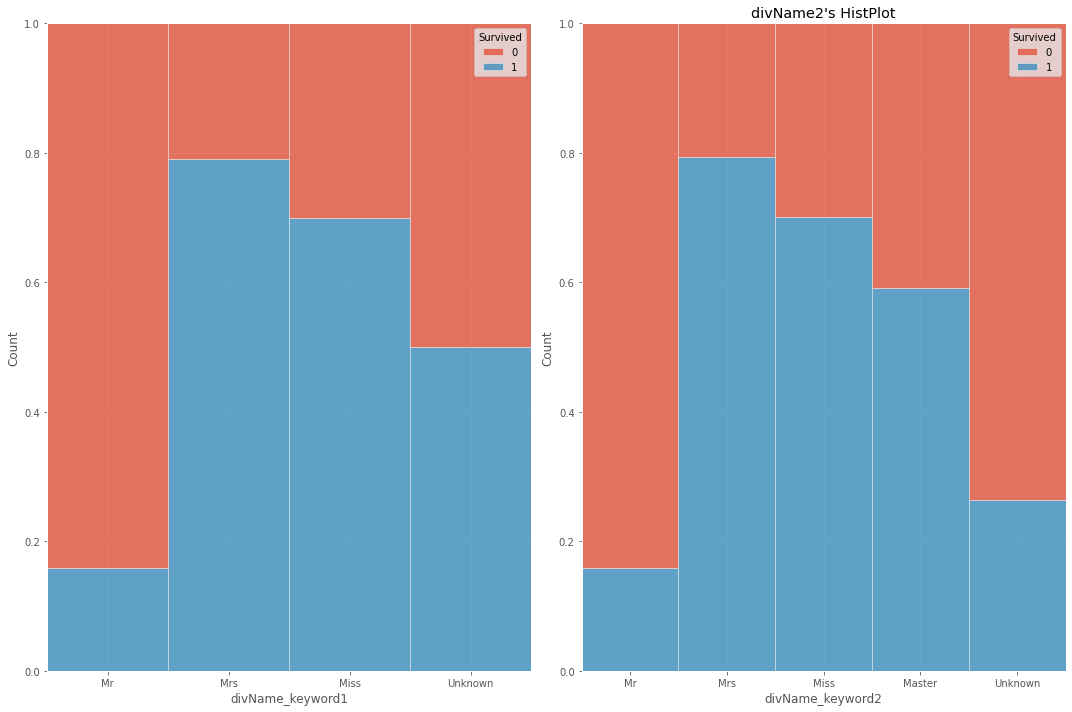

In [434]:
fig, ax = plt.subplots(1,2)

sns.histplot(data = train_df_modify , x= 'divName_keyword1', hue = 'Survived', label='divName1', multiple='fill', ax= ax[0])
sns.histplot(data = train_df_modify , x= 'divName_keyword2', hue = 'Survived', label='divName2', multiple='fill', ax = ax[1])

plt.title("divName2's HistPlot")
plt.tight_layout()
plt.show()

### 새로운 분류 후 비교
- 성인 남자, 여자, 젊은 여성의 생존률에는 큰 변화가 없었음.
- 50% 정도 되던 알 수 없는 생존자들의 대부분이 젊은 남성이었던 것으로 보임
- 이전 분류보다 생존자 분류에 의미가 있어 보임.


#### 나이

<AxesSubplot:xlabel='Age', ylabel='Count'>

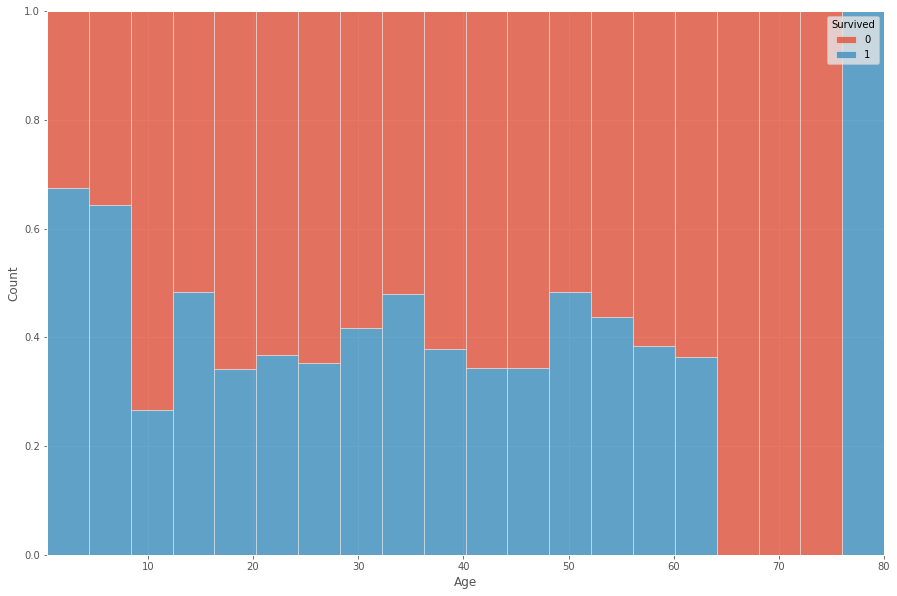

In [435]:
sns.histplot(data= train_df_modify, x='Age', hue='Survived', multiple='fill')

In [436]:
train_df_modify['Age'].isnull().sum()

177

In [437]:
test2_df['Age'].isnull().sum()

86

In [438]:
# 나이를 모르는 데이터 
target = train_df_modify[train_df_modify['Age'].isnull()]

for key in train_df_modify['divName_keyword2'].unique():
  print(key, " : ", len(target[target['divName_keyword2'] == key]))

Mr  :  119
Mrs  :  17
Miss  :  36
Master  :  4
Unknown  :  1


In [439]:
# 나이를 아는 데이터
target = train_df_modify[~train_df_modify['Age'].isnull()]
for key in train_df_modify['divName_keyword2'].unique():
  print(key)
  print(target[target['divName_keyword2'] == key]['Age'].describe())
  print()

Mr
count    399.000000
mean      32.409774
std       12.720098
min       11.000000
25%       23.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

Mrs
count    109.000000
mean      35.788991
std       11.437490
min       14.000000
25%       27.000000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

Miss
count    148.000000
mean      21.993243
std       13.089921
min        0.750000
25%       14.375000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

Master
count    40.000000
mean      7.741750
std      10.972532
min       0.420000
25%       1.750000
50%       4.000000
75%       9.000000
max      52.000000
Name: Age, dtype: float64

Unknown
count    18.000000
mean     44.888889
std      12.942810
min      23.000000
25%      34.250000
50%      46.500000
75%      54.000000
max      70.000000
Name: Age, dtype: float64



- 별칭에 대한 분류가 완벽하지 않음이 보였음. 따라서 평균값보다는 중간값을 사용하는게 맞다고 판단함.

In [440]:
for key in train_df_modify['divName_keyword2'].unique():
  print(key)
  print(target[target['divName_keyword2'] == key]['Age'].median())
  print()

Mr
30.0

Mrs
35.0

Miss
21.0

Master
4.0

Unknown
46.5



In [441]:
target = train_df_modify[train_df_modify['Age'].isnull()]
target2 = test2_df[test2_df['Age'].isnull()]

for key in train_df_modify['divName_keyword2'].unique():
  modify_index = target[target['divName_keyword2'] == key].index
  modify_index2 = target2[target2['divName_keyword2'] == key].index

  if key =='Mr':
    train_df_modify['Age'].loc[modify_index] = 30
    test2_df['Age'].loc[modify_index2] = 30

  elif key == 'Mrs':
    train_df_modify['Age'].loc[modify_index] = 35
    test2_df['Age'].loc[modify_index2] = 35
  
  elif key == 'Miss':
    train_df_modify['Age'].loc[modify_index] = 21
    test2_df['Age'].loc[modify_index2] = 21

  elif key == 'Master':
    train_df_modify['Age'].loc[modify_index] = 4
    test2_df['Age'].loc[modify_index2] = 4

  elif key == 'Unknown':
    train_df_modify['Age'].loc[modify_index] = 46
    test2_df['Age'].loc[modify_index2] = 46

In [442]:
train_df_modify['Age'].isnull().sum(), test2_df['Age'].isnull().sum() 

(0, 0)

<AxesSubplot:xlabel='Age', ylabel='Count'>

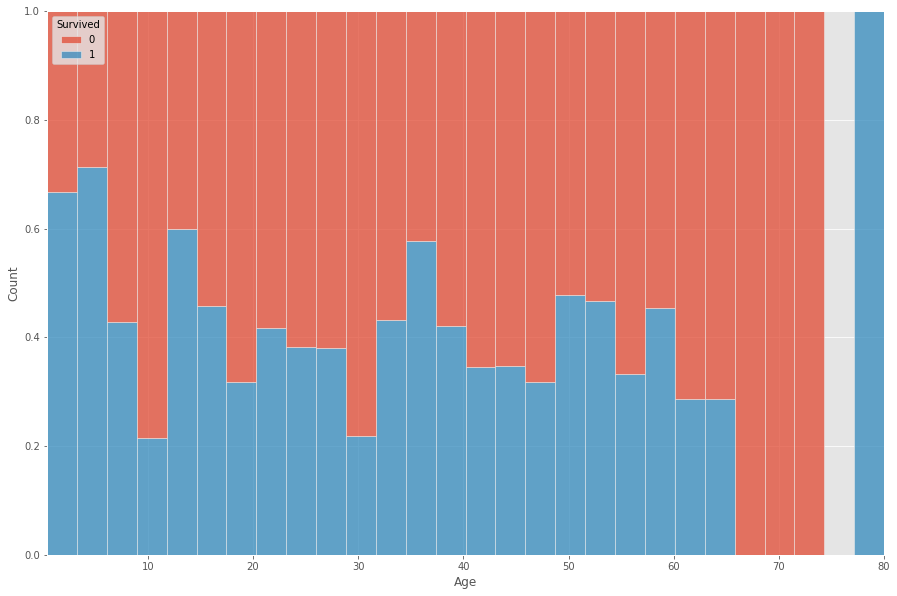

In [443]:
sns.histplot(data= train_df_modify, x='Age', hue='Survived', multiple='fill')

In [444]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [445]:
train_df_modify[train_df_modify['Pclass']==3][train_df_modify[train_df_modify['Pclass']==3]['Age']>60]['Fare'].mean()

7.82

- 요금에 대한 결측값은 최종 테스트 데이터에 한 개만 존재하여 훈련 데이터에서 등급이 같고 나이가 60세 이상인 사람(4명)의 평균 요금으로 대체

In [446]:
test_df['Fare'].loc[152] = 7.82

In [447]:
train_df_modify['divCabin'] = train_df_modify['Cabin'].apply(divCabin)
test2_df['divCabin'] = test2_df['Cabin'].apply(divCabin)

In [448]:
train_df_modify.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,divName,divName_keyword1,divName_keyword2,divCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,Mr,Mr,None


In [449]:
test2_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,divName,divName_keyword1,divName_keyword2,divCabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Mr,Mr,None


#### 다시 모델 적용

In [450]:
drop_cols = ['PassengerId', 'Ticket', 'Cabin', 'Name', 'divName_keyword1', 'divName']

train_df_modify = train_df_modify.drop(drop_cols, axis=1)
test2_df = test2_df.drop(drop_cols, axis=1)


In [451]:
label_col = ['Sex', 'divName_keyword2', 'divCabin','Embarked']
les = []

for col in label_col:
  le = LabelEncoder()
  train_df_modify[col] = le.fit_transform(train_df_modify[col])
  test2_df[col] = le.transform(test2_df[col])
  les.append(le)



In [453]:
X = train_df_modify.drop('Survived', axis=1)
y = train_df_modify['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
logi = LogisticRegression()

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logi.fit(X_train, y_train)

tree_pred = tree.predict(test2_df)
rf_pred = rf.predict(test2_df)
xgb_pred = xgb.predict(test2_df)
logi_pred = logi.predict(test2_df)

print("DecisionTree : {:.2f}%" .format(tree.score(X_test, y_test)*100))
print("RandomForest : {:.2f}%" .format(rf.score(X_test, y_test)*100))
print("XGBoost : {:.2f}%" .format(xgb.score(X_test, y_test)*100))
print("Logisitc : {:.2f}%" .format(logi.score(X_test, y_test)*100))

DecisionTree : 75.42%
RandomForest : 79.89%
XGBoost : 81.01%
Logisitc : 80.45%


In [455]:
submission['Survived'] = xgb_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission2.csv', index=False)

#### 소폭 상승
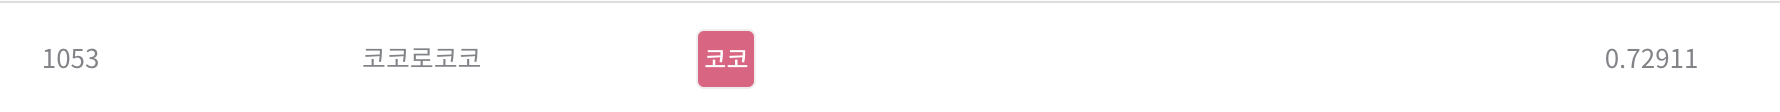

#### 객실에 대한 데이터가 부실했으니 없이 ..?

In [457]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'divName_keyword2', 'divCabin'],
      dtype='object')

In [458]:
X = train_df_modify.drop(['Survived','divCabin'], axis=1)
y = train_df_modify['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
logi = LogisticRegression()

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logi.fit(X_train, y_train)

tree_pred = tree.predict(test2_df.drop('divCabin', axis=1))
rf_pred = rf.predict(test2_df.drop('divCabin', axis=1))
xgb_pred = xgb.predict(test2_df.drop('divCabin', axis=1))
logi_pred = logi.predict(test2_df.drop('divCabin', axis=1))

print("DecisionTree : {:.2f}%" .format(tree.score(X_test, y_test)*100))
print("RandomForest : {:.2f}%" .format(rf.score(X_test, y_test)*100))
print("XGBoost : {:.2f}%" .format(xgb.score(X_test, y_test)*100))
print("Logisitc : {:.2f}%" .format(logi.score(X_test, y_test)*100))

DecisionTree : 75.42%
RandomForest : 81.01%
XGBoost : 82.12%
Logisitc : 81.01%


In [459]:
submission['Survived'] = xgb_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission2.csv', index=False)

#### 훈련, 테스트 모두 큰 변화는 없었음 최종 데이터에는 0.2% 하락.. 의미있는 분류는 아니었음

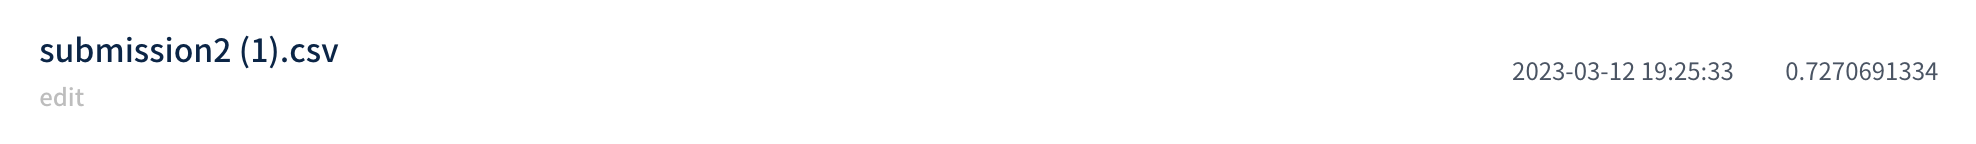